In [6]:
#Question 1
#create the list of unsorted elements
list = [2,4,6,8,4,5,2,1,9,0,4,6,7,4, 3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]

#create a blank dictionary
numfrequency = {}

#count the freq of elements and store in the blank dictionary
for num in list:
   if (num in numfrequency):
      numfrequency[num] += 1
   else:
      numfrequency[num] = 1
        
#print dictionary to confirm
numfrequency

{2: 4, 4: 5, 6: 6, 8: 3, 5: 2, 1: 3, 9: 5, 0: 2, 7: 4, 3: 5, 10: 3}

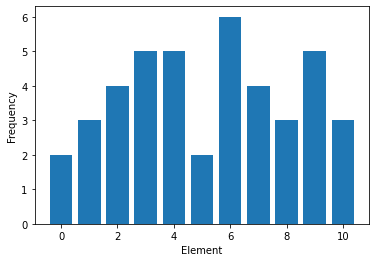

In [7]:
import matplotlib.pyplot as plt

#name the ind and dep variables from dictionary
num = numfrequency.keys()
freq = numfrequency.values()

#specify parameters of plot
plt.bar(num, freq)
plt.xlabel("Element")
plt.ylabel("Frequency")
plt.show()

In [8]:
#convert to Json
import json
y = json.dumps(numfrequency)
y

'{"2": 4, "4": 5, "6": 6, "8": 3, "5": 2, "1": 3, "9": 5, "0": 2, "7": 4, "3": 5, "10": 3}'

In [9]:
#Question 2
#import Amazon order data as a panda
import pandas as pd

data = pd.read_csv(r"C:\Users\smccu\OneDrive\Documents\Midterm_AmazonOrderData.csv")

#confirm the data imported correctly
data.head()

,Order Date,Order ID,Website,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Order Status,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name
0,9/12/2018,114-2578888-2473057,Amazon.com,9/12/2018,Address unavailable,NaN,NaN,Shipped,$20.00,$0.00,$0.00,$0.00,$0.00,$20.00,Sean McCunney
1,9/12/2018,114-8941073-3909803,Amazon.com,9/12/2018,Address unavailable,NaN,NaN,Shipped,$25.00,$0.00,$0.00,$0.00,$0.00,$25.00,Sean McCunney
2,9/12/2018,114-6481576-4645867,Amazon.com,9/12/2018,Address unavailable,NaN,NaN,Shipped,$25.00,$0.00,$0.00,$0.00,$0.00,$25.00,Sean McCunney
3,9/12/2018,114-7503085-5301840,Amazon.com,9/13/2018,Sean McCunney,WASHINGTON,DC,Shipped,$31.62,$0.00,$0.96,$0.75,$0.96,$31.83,Sean McCunney
4,10/8/2018,114-2317993-7945801,Amazon.com,10/9/2018,Sean McCunney,WASHINGTON,DC,Shipped,$5.99,$0.00,$0.00,$0.00,$0.00,$5.99,Sean McCunney


In [10]:
#clean data, replace empty datapoints with 0 and make "Total Charged" values floats
data = data.fillna(0)
data["Total Charged"] = data["Total Charged"].str.replace('$','').astype(float)
data.head()

,Order Date,Order ID,Website,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Order Status,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name
0,9/12/2018,114-2578888-2473057,Amazon.com,9/12/2018,Address unavailable,0,0,Shipped,$20.00,$0.00,$0.00,$0.00,$0.00,20.00,Sean McCunney
1,9/12/2018,114-8941073-3909803,Amazon.com,9/12/2018,Address unavailable,0,0,Shipped,$25.00,$0.00,$0.00,$0.00,$0.00,25.00,Sean McCunney
2,9/12/2018,114-6481576-4645867,Amazon.com,9/12/2018,Address unavailable,0,0,Shipped,$25.00,$0.00,$0.00,$0.00,$0.00,25.00,Sean McCunney
3,9/12/2018,114-7503085-5301840,Amazon.com,9/13/2018,Sean McCunney,WASHINGTON,DC,Shipped,$31.62,$0.00,$0.96,$0.75,$0.96,31.83,Sean McCunney
4,10/8/2018,114-2317993-7945801,Amazon.com,10/9/2018,Sean McCunney,WASHINGTON,DC,Shipped,$5.99,$0.00,$0.00,$0.00,$0.00,5.99,Sean McCunney


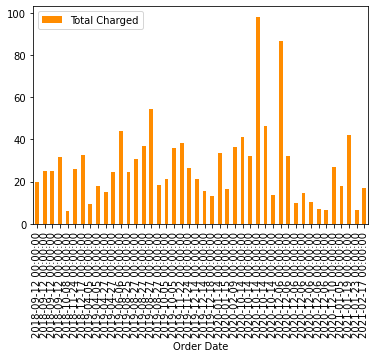

In [25]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data.plot.bar(x = 'Order Date', y = 'Total Charged', color='darkorange')
plt.show()

In [12]:
#calculate total spent on Amazon orders
total = data['Total Charged'].sum()
total

1208.5899999999997

In [13]:
#calculate average amount spent per order on Amazon
avg = data['Total Charged'].mean()
avg

27.467954545454543

In [14]:
#calculate the average amount spent per order pre-tax
data['Subtotal'] = data['Subtotal'].str.replace('$','').astype(float)
data['Subtotal'].sum()

1142.7800000000002

In [15]:
#use the pre-tax total, and the order total to find amount spent on taxes
taxtotal = data['Total Charged'].sum()-data['Subtotal'].sum()
taxtotal

65.80999999999949